## This code is from NLP Zero to Hero from tensorflow with some modifications
Code explanation in this videos:
<a href="https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S
" target="_blank"><img src="https://i.ytimg.com/vi/fNxaJsNG3-s/hqdefault.jpg?sqp=-oaymwEXCNACELwBSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLCCPWFf5dlgclLSASw0WCvwTHeQaQ" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


## Natural Language Processing - Tokenization (NLP Zero to Hero - Part 1 / 2)

In [2]:
sentences = {
    'I love my dog',
    'I love my car',
    'You love my dog',
    'You love my cat'
}

In [3]:
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=5)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'love': 2, 'my': 3, 'you': 4, 'i': 5, 'dog': 6, 'cat': 7, 'car': 8}
[[4, 2, 3, 7], [5, 2, 3, 6], [5, 2, 3, 8], [4, 2, 3, 6]]
[[4 2 3 7 0]
 [5 2 3 6 0]
 [5 2 3 8 0]
 [4 2 3 6 0]]


In [4]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 2, 3, 6], [3, 6, 1, 3, 1]]


## Modeling a Sarcasm Prediction

### Training a model to recognize sentiment in text (NLP Zero to Hero - Part 3)

In [5]:
import pandas as pd

datastore = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines = True)

sentences = datastore['headline'].tolist()
labels = datastore['is_sarcastic'].tolist()
urls = datastore['article_link'].tolist()

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [8]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6769 - accuracy: 0.5612 - val_loss: 0.6286 - val_accuracy: 0.6081
Epoch 2/30
625/625 - 2s - loss: 0.4631 - accuracy: 0.8135 - val_loss: 0.3951 - val_accuracy: 0.8331
Epoch 3/30
625/625 - 2s - loss: 0.3199 - accuracy: 0.8709 - val_loss: 0.3597 - val_accuracy: 0.8448
Epoch 4/30
625/625 - 2s - loss: 0.2674 - accuracy: 0.8950 - val_loss: 0.3473 - val_accuracy: 0.8521
Epoch 5/30
625/625 - 2s - loss: 0.2303 - accuracy: 0.9112 - val_loss: 0.3530 - val_accuracy: 0.8442
Epoch 6/30
625/625 - 2s - loss: 0.2043 - accuracy: 0.9227 - val_loss: 0.3518 - val_accuracy: 0.8529
Epoch 7/30
625/625 - 2s - loss: 0.1803 - accuracy: 0.9326 - val_loss: 0.3549 - val_accuracy: 0.8536
Epoch 8/30
625/625 - 2s - loss: 0.1631 - accuracy: 0.9398 - val_loss: 0.3702 - val_accuracy: 0.8529
Epoch 9/30
625/625 - 2s - loss: 0.1480 - accuracy: 0.9463 - val_loss: 0.3827 - val_accuracy: 0.8532
Epoch 10/30
625/625 - 2s - loss: 0.1331 - accuracy: 0.9535 - val_loss: 0.4006 - val_accuracy: 0.8523

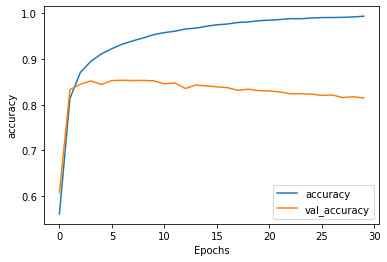

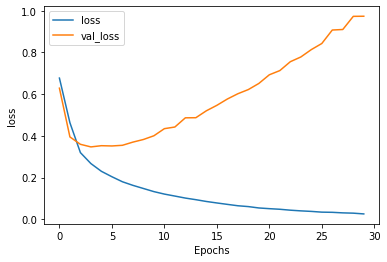

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.569130e-01]
 [7.543564e-04]]


##### If help you, please upvote! Thak you 😃